In [1]:
from pathlib import Path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import optimize
import scipy.optimize
#from scipy.ndimage import gaussian_filter1d
import sys

In [2]:
date = '20211208'
dataNo = 2
scanNo = 2

In [3]:
path = r"./"+date
path_img = path + r"/data" + str('%03d' % dataNo) + "/raw"
path_scan = path + r"/scandir/Scan" + str('%03d' % scanNo) + '.txt'
path_param = path + r"/scandir/Parameters" + str('%03d' % scanNo) + '.txt'
scan_data = pd.read_csv(path_scan, delimiter='\t')

In [4]:
param_name = 'A0157: OL (H1): AM for physics 2'
scan_param =3.4/4*np.exp((scan_data[param_name]-5.03)/0.646)
unique_param = scan_param.unique()
sample1 = unique_param[8]
sample2 = unique_param[18]
sample3 = unique_param[27]
# sample1 = unique_param[1]
# sample2 = unique_param[10]
# sample3 = unique_param[20]
unit = '[ER]'

In [5]:
share = Path(path_img)
if share.exists():
    trans_files = list(Path(path_img).glob('seq*_trans001.tiff'))
    flat_files = list(Path(path_img).glob('seq*_flat001.tiff'))
    update_files = list(Path(path_img).glob('seq*_update001.tiff'))
else:
    print(No)

img_flat_ave =[]
img_trans_ave = []
img_trans_list = []
for N in range(len(trans_files)):
    img_flat_ave += [np.array(Image.open(flat_files[N]))]
    img_trans_ave += [np.array(Image.open(trans_files[N]))]
img_flat_ave = np.average(img_flat_ave,axis=0)
img_trans_ave =np.average(img_trans_ave,axis=0) -img_flat_ave
for N in range(len(trans_files)):
    img_trans_list += [np.array(Image.open(trans_files[N])) - img_flat_ave]

img_trans_sample1 = []
img_trans_sample2 = []
img_trans_sample3 = []
for N in range(len(trans_files)):
    if scan_param[N] == sample1:
        img_trans_sample1 += [np.array(Image.open(trans_files[N]))]
    elif scan_param[N] == sample2:
        img_trans_sample2 += [np.array(Image.open(trans_files[N]))]
    elif scan_param[N] == sample3:
        img_trans_sample3 += [np.array(Image.open(trans_files[N]))]
img_trans_sample1 = np.average(img_trans_sample1,axis=0) -img_flat_ave
img_trans_sample2 = np.average(img_trans_sample2,axis=0) -img_flat_ave
img_trans_sample3 = np.average(img_trans_sample3,axis=0) -img_flat_ave

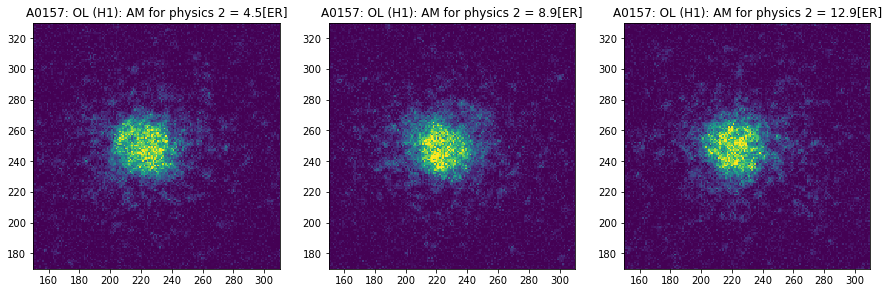

In [6]:
vmin = 0
vmax = 1000
xlim_1 = 150; xlim_2 = 310
ylim_1 = 170; ylim_2 = 330

fig =plt.figure(figsize=[15,10])
ax1 = fig.add_subplot(1,3,1)
mappable =ax1.pcolormesh(img_trans_sample1, vmin=vmin, vmax=vmax, shading='auto')
ax1.set_aspect('equal')
ax1.set_xlim(xlim_1,xlim_2)
ax1.set_ylim(ylim_1,ylim_2)
ax1.set_title(param_name+ " = %.01f"%(sample1)+unit)

ax2 = fig.add_subplot(1,3,2)
mappable =ax2.pcolormesh(img_trans_sample2, vmin=vmin, vmax=vmax, shading='auto')
ax2.set_aspect('equal')
ax2.set_xlim(xlim_1,xlim_2)
ax2.set_ylim(ylim_1,ylim_2)
ax2.set_title(param_name+" = %.01f"%(sample2)+unit)

ax3 = fig.add_subplot(1,3,3)
mappable =ax3.pcolormesh(img_trans_sample3, vmin=vmin, vmax=vmax, shading='auto')
ax3.set_aspect('equal')
ax3.set_xlim(xlim_1,xlim_2)
ax3.set_ylim(ylim_1,ylim_2)
ax3.set_title(param_name+ " = %.01f"%(sample3)+unit)

plt.show()

In [7]:
CoMx_list=[]
CoMy_list=[]

sample_files = [img_trans_sample1[ylim_1:ylim_2,xlim_1:xlim_2],img_trans_sample2[ylim_1:ylim_2,xlim_1:xlim_2],img_trans_sample3[ylim_1:ylim_2,xlim_1:xlim_2]]

for N in range(len(sample_files)):
    CoMy = []
    CoMx = []
    nx=np.sum(sample_files[N], axis=0)/np.sum(sample_files[N])
    ny=np.sum(sample_files[N], axis=1)/np.sum(sample_files[N])
    for i in range(len(nx)):
        CoMx += [i*nx[i]]
    for i in range(len(ny)):
        CoMy += [i*ny[i]]
    CoMx_list.append(np.sum(CoMx))
    CoMy_list.append(np.sum(CoMy))

CoMx_int_list = np.round(CoMx_list) + xlim_1
CoMy_int_list = np.round(CoMy_list) + ylim_1
CoMx_int_list = CoMx_int_list.astype(int)
CoMy_int_list = CoMy_int_list.astype(int)

(-100.0, 1200.0)

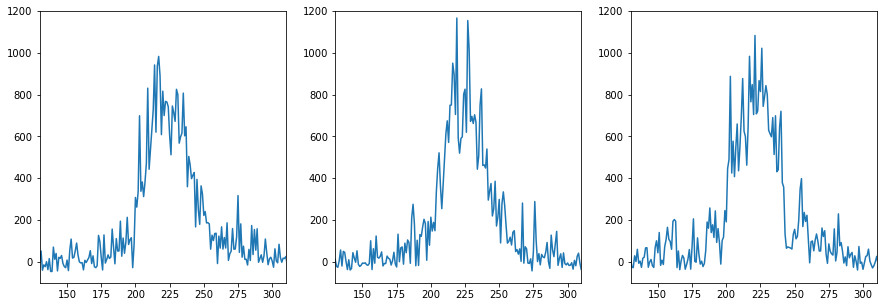

In [8]:
xlim_1 = 130
xlim_2 = 310
ylim_1 = -100
ylim_2 = 1200
fig = plt.figure(figsize=[15, 5])
ax1 = fig.add_subplot(1,3,1)
ax1.plot(img_trans_sample1[CoMy_int_list[0]])
ax1.set_xlim(xlim_1,xlim_2)
ax1.set_ylim(ylim_1,ylim_2)

ax2 = fig.add_subplot(1,3,2)
ax2.plot(img_trans_sample2[CoMy_int_list[1]])
ax2.set_xlim(xlim_1,xlim_2)
ax2.set_ylim(ylim_1,ylim_2)

ax3 = fig.add_subplot(1,3,3)
ax3.plot(img_trans_sample3[CoMy_int_list[2]])
ax3.set_xlim(xlim_1,xlim_2)
ax3.set_ylim(ylim_1,ylim_2)

Text(0, 0.5, '$log_{10}[U/(6J)]$')

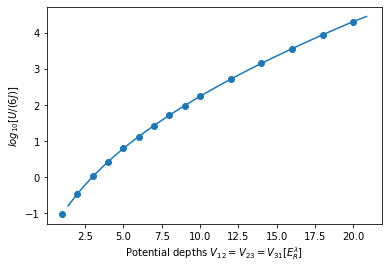

In [9]:
## Hubbard parameters for each potential depth
depth = np.array([1,2,3,4,5,6,7,8,9,10,12,14,16,18,20])
u_ov_6t = np.array([0.09423759108,0.3405272348,1.039420807,2.675594004,6.195279846,13.2800499,26.83593553,51.74380519,96.0052570,172.4697909,514.2282016,1408.480766,3606.249368,8736.47373,20204.02751])
z = np.polyfit(depth, np.log10(u_ov_6t), 7)
p = np.poly1d(z)
x_list = np.linspace(np.min(unique_param),np.max(unique_param),100)

plt.scatter(depth, np.log10(u_ov_6t))
plt.plot(x_list,p(x_list))
plt.xlabel(r'Potential depths $V_{12}=V_{23}=V_{31}[E_R^{\lambda}]$')
plt.ylabel(r'$log_{10}[U/(6J)]$')

In [10]:
10**p(sample1),10**p(sample2), 10**p(sample3) 

(4.080919143380419, 90.91482969273372, 816.1548018612823)

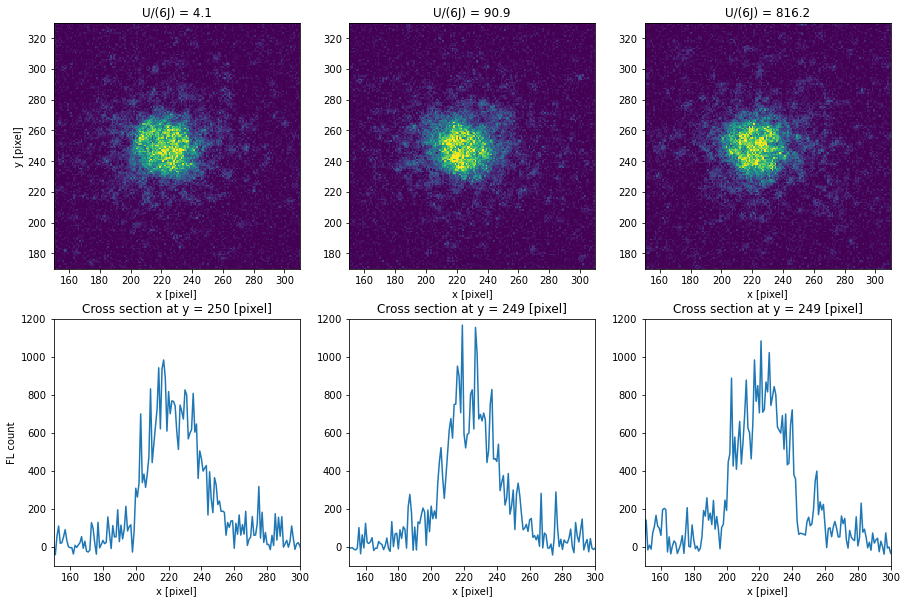

In [11]:
vmin = 0
vmax = 1000
xlim_1 = 150; xlim_2 = 310
ylim_1 = 170; ylim_2 = 330

fig =plt.figure(figsize=[15,10])
ax1 = fig.add_subplot(2,3,1)
mappable =ax1.pcolormesh(img_trans_sample1, vmin=vmin, vmax=vmax, shading='auto')
ax1.set_aspect('equal')
ax1.set_xlim(xlim_1,xlim_2)
ax1.set_ylim(ylim_1,ylim_2)
ax1.set_title("U/(6J) = %.01f"%(10**p(sample1)))
ax1.set_xlabel("x [pixel]")
ax1.set_ylabel("y [pixel]")

ax2 = fig.add_subplot(2,3,2)
mappable =ax2.pcolormesh(img_trans_sample2, vmin=vmin, vmax=vmax, shading='auto')
ax2.set_aspect('equal')
ax2.set_xlim(xlim_1,xlim_2)
ax2.set_ylim(ylim_1,ylim_2)
ax2.set_title("U/(6J) = %.01f"%(10**p(sample2)))
ax2.set_xlabel("x [pixel]")

ax3 = fig.add_subplot(2,3,3)
mappable =ax3.pcolormesh(img_trans_sample3, vmin=vmin, vmax=vmax, shading='auto')
ax3.set_aspect('equal')
ax3.set_xlim(xlim_1,xlim_2)
ax3.set_ylim(ylim_1,ylim_2)
ax3.set_title("U/(6J) = %.01f"%(10**p(sample3)))
ax3.set_xlabel("x [pixel]")

xlim_1 = 150
xlim_2 = 300
ylim_1 = -100
ylim_2 = 1200

ax4 = fig.add_subplot(2,3,4)
ax4.plot(img_trans_sample1[CoMy_int_list[0]])
ax4.set_xlim(xlim_1,xlim_2)
ax4.set_ylim(ylim_1,ylim_2)
ax4.set_xlabel("x [pixel]")
ax4.set_ylabel("FL count")
ax4.set_title("Cross section at y = %d [pixel]"%(CoMy_int_list[0]))

ax5 = fig.add_subplot(2,3,5)
ax5.plot(img_trans_sample2[CoMy_int_list[1]])
ax5.set_xlim(xlim_1,xlim_2)
ax5.set_ylim(ylim_1,ylim_2)
ax5.set_xlabel("x [pixel]")
ax5.set_title("Cross section at y = %d [pixel]"%(CoMy_int_list[1]))

ax6 = fig.add_subplot(2,3,6)
ax6.plot(img_trans_sample3[CoMy_int_list[2]])
ax6.set_xlim(xlim_1,xlim_2)
ax6.set_ylim(ylim_1,ylim_2)
ax6.set_xlabel("x [pixel]")
ax6.set_title("Cross section at y = %d [pixel]"%(CoMy_int_list[2]))

plt.show()

In [12]:
fl_list = []
fl_err_list = []  
for i in range(len(unique_param)):
    fl_temp = []
    for j in range(len(trans_files)):
        if scan_param[j] == unique_param[i]:
            fl_temp.append(np.sum(img_trans_list[j]))
    fl_list.append(np.mean(fl_temp))
    fl_err_list.append(np.std(fl_temp))

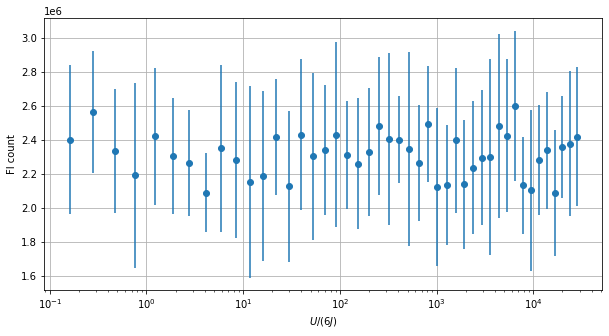

In [13]:
fig = plt.figure(figsize=[10,5])
ax1 = fig.add_subplot(111)
ax1.errorbar(10**p(unique_param), fl_list, fl_err_list, fmt='o')
ax1.set_xscale('log')
ax1.set_xlabel(r"$U/(6J)$")
ax1.set_ylabel('Fl count')
ax1.grid()
